In [16]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM, RepeatVector
from keras.models import Model

In [17]:
input_img = Input(shape=(28, 28))  # adapt this if using `channels_first` image data format

In [18]:
#x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#encoded = MaxPooling2D((2, 2), padding='same')(x)

In [19]:
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

#x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
#x = Conv2D(16, (3, 3), activation='relu')(x)
#x = UpSampling2D((2, 2))(x)
#decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [20]:
#x = LSTM(64, activation='relu', return_sequences=True)(input_img)
#x = RepeatVector(28)(x)
#decoded = LSTM(28, activation='relu', return_sequences=True)(x)

In [21]:

x = LSTM(128, activation='relu', return_sequences=True)(input_img)
#x = RepeatVector(28)(x)
#x = LSTM(64, activation='relu', return_sequences=True)(x)
x = LSTM(32, activation='relu', return_sequences=True)(x)
#x = RepeatVector(28)(x)
#x = LSTM(64, activation='relu', return_sequences=True)(x)
x = LSTM(128, activation='relu', return_sequences=True)(x)
#x = RepeatVector(28)(x)
decoded = LSTM(28, activation='relu', return_sequences=True)(x)


In [22]:
autoencoder = Model(input_img, decoded)

In [23]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
lstm_6 (LSTM)                (None, 28, 32)            20608     
_________________________________________________________________
lstm_7 (LSTM)                (None, 28, 128)           82432     
_________________________________________________________________
lstm_8 (LSTM)                (None, 28, 28)            17584     
Total params: 201,008
Trainable params: 201,008
Non-trainable params: 0
_________________________________________________________________


In [24]:
#autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28))  # adapt this if using `channels_first` image data format

In [26]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=1000)

Epoch 1/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.4068 - acc: 0.8063
Epoch 2/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2713 - acc: 0.7991
Epoch 3/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2993 - acc: 0.8034
Epoch 4/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2731 - acc: 0.8007
Epoch 5/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2672 - acc: 0.8004
Epoch 6/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2547 - acc: 0.8000
Epoch 7/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2528 - acc: 0.8001
Epoch 8/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2492 - acc: 0.8016
Epoch 9/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2694 - acc: 0.8015 0s - loss: 0.2686 - acc: 0.801
Epoch 10/30
60000/60000 [==============================] - 6

In [27]:
x_test1 = x_test[:10]
x_test1.shape

(10, 28, 28)

In [28]:
x_test2 = x_test[10:20]
x_test2.shape

(10, 28, 28)

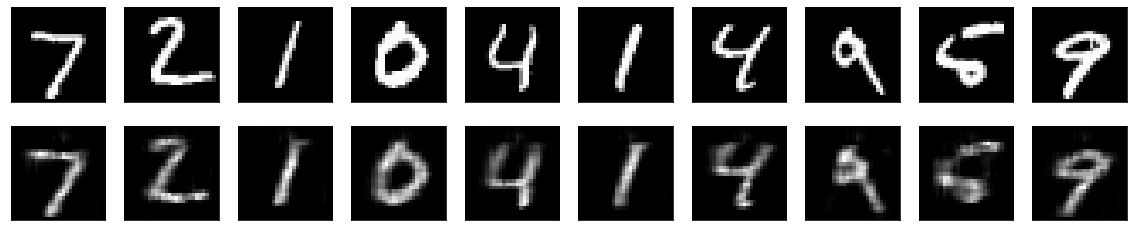

In [29]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

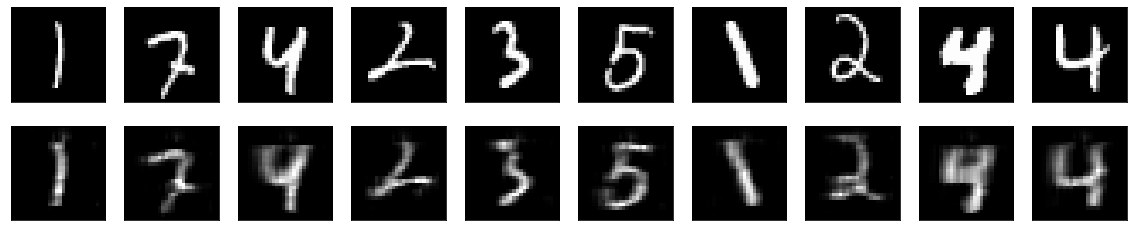

In [30]:
import matplotlib.pyplot as plt

x_test2 = x_test[40:50]
decoded_imgs = autoencoder.predict(x_test2)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()